In [1]:
import pandas as pd

In [2]:
# title 중복된값 제거

In [3]:
df_title = pd.read_csv('data/movies_metadata.csv', low_memory=False)

In [4]:
df_title = df_title[['title', 'id']]

In [5]:
df_title = df_title.drop_duplicates()

In [6]:
# rating 필요한 컬럼만 가공

In [7]:
df_rating = pd.read_csv('data/ratings_small.csv')

In [8]:
df_rating

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [9]:
df_rating['movieId'].nunique()

9066

In [10]:
df_rating = df_rating.iloc[ : , :2+1]

In [9]:
# merge 하기 위해 데이터 똑같이 맞춤

In [11]:
df_title = df_title.rename(columns={'id':'movieId'})

In [12]:
df_title

,title,movieId
0,Toy Story,862
1,Jumanji,8844
2,Grumpier Old Men,15602
3,Waiting to Exhale,31357
4,Father of the Bride Part II,11862
...,...,...
45461,Subdue,439050
45462,Century of Birthing,111109
45463,Betrayal,67758
45464,Satan Triumphant,227506


In [13]:
df_title = df_title.dropna()

In [14]:
df_title['movieId'] = df_title['movieId'].astype(int)

C:\Users\-\AppData\Local\Temp/ipykernel_11280/3391263016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title['movieId'] = df_title['movieId'].astype(int)


In [15]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    45430 non-null  object
 1   movieId  45430 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 887.3+ KB


In [ ]:
# 데이터 합치기

In [16]:
df = pd.merge(df_title, df_rating, on='movieId')

In [17]:
df

,title,movieId,userId,rating
0,Heat,949,23,3.5
1,Heat,949,102,4.0
2,Heat,949,232,2.0
3,Heat,949,242,5.0
4,Heat,949,263,3.0
...,...,...,...,...
44984,Travelling with Pets,64197,73,4.0
44985,Travelling with Pets,64197,544,5.0
44986,Travelling with Pets,64197,648,3.5
44987,Cinderella,98604,352,4.0


In [ ]:
# rating 의 count 의 분포를 분석

In [18]:
df['title'].nunique()

2794

In [19]:
df.groupby('title')['rating'].count().describe()

count    2794.000000
mean       16.102004
std        31.481795
min         1.000000
25%         1.000000
50%         4.000000
75%        15.750000
max       324.000000
Name: rating, dtype: float64

<AxesSubplot:>

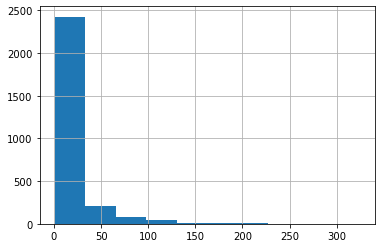

In [20]:
df.groupby('title')['rating'].count().to_frame()['rating'].hist()

In [ ]:
# mean count 구하고 별점 높은 영화중 count 를 조절하여 자르자

In [63]:
df.groupby('title')['rating'].count()

title
!Women Art Revolution      883
$1,000 on the Black          1
$5 a Day                   156
'Gator Bait                195
'R Xmas                     86
                          ... 
Ödipussi                   253
Şaban Oğlu Şaban           123
Škola princů                 2
Šíleně smutná princezna    329
Львиная доля                 5
Name: rating, Length: 7409, dtype: int64

In [66]:
df2 = df.groupby('title')['rating'].count().to_frame()

In [60]:
df['count2'] = df.groupby('title')['rating'].count().to_frame()

In [68]:
df3 = pd.merge(df, df2, on='title' )

In [72]:
df

,title,movieId,userId,rating,count,count2
0,Toy Story,862,1923,3.0,NaN,NaN
1,Toy Story,862,2103,5.0,NaN,NaN
2,Toy Story,862,5380,1.0,NaN,NaN
3,Toy Story,862,6177,4.0,NaN,NaN
4,Toy Story,862,6525,4.0,NaN,NaN
...,...,...,...,...,...,...
11436563,Century of Birthing,111109,33940,2.5,NaN,NaN
11436564,Century of Birthing,111109,172224,3.0,NaN,NaN
11436565,Century of Birthing,111109,210792,3.0,NaN,NaN
11436566,Century of Birthing,111109,225396,3.5,NaN,NaN


<AxesSubplot:>

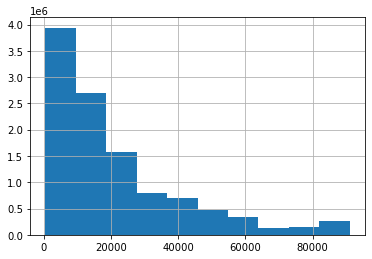

In [78]:
df3.loc[df3['rating_y'] > 500 , ]['rating_y'].hist()

In [89]:
(df3['rating_y'] > 500) & (df3['rating_y'] < 3000)

0           False
1           False
2           False
3           False
4           False
            ...  
11436563    False
11436564    False
11436565    False
11436566    False
11436567    False
Name: rating_y, Length: 11436568, dtype: bool

In [94]:
df3.loc[(df3['rating_y'] > 3000) & (df3['rating_y'] < 10000) , ]['title'].nunique()

479

In [95]:
df3.loc[(df3['rating_y'] > 3000) & (df3['rating_y'] < 10000) , ]

,title,movieId,userId,rating_x,count,count2,rating_y
18120,Casino,524,24,2.0,NaN,NaN,9163
18121,Casino,524,43,2.5,NaN,NaN,9163
18122,Casino,524,71,2.0,NaN,NaN,9163
18123,Casino,524,120,3.0,NaN,NaN,9163
18124,Casino,524,122,4.0,NaN,NaN,9163
...,...,...,...,...,...,...,...
11434627,Frankenstein Created Woman,3104,270698,2.5,NaN,NaN,5756
11434628,Frankenstein Created Woman,3104,270731,4.0,NaN,NaN,5756
11434629,Frankenstein Created Woman,3104,270759,3.5,NaN,NaN,5756
11434630,Frankenstein Created Woman,3104,270776,5.0,NaN,NaN,5756


In [77]:
df3.loc[df3['rating_y'] > 500 , ].groupby('title')['rating_x'].count().describe()

count     1835.000000
mean      6030.730790
std       9549.271721
min        501.000000
25%       1071.000000
50%       2361.000000
75%       6687.500000
max      91082.000000
Name: rating_x, dtype: float64

In [61]:
df.loc[df['count2'].notnull() , ]

,title,movieId,userId,rating,count,count2


In [52]:
df

,title,movieId,userId,rating
0,Toy Story,862,1923,3.0
1,Toy Story,862,2103,5.0
2,Toy Story,862,5380,1.0
3,Toy Story,862,6177,4.0
4,Toy Story,862,6525,4.0
...,...,...,...,...
11436563,Century of Birthing,111109,33940,2.5
11436564,Century of Birthing,111109,172224,3.0
11436565,Century of Birthing,111109,210792,3.0
11436566,Century of Birthing,111109,225396,3.5


In [51]:
df_pivot = df.pivot_table(values='rating', index='userId', columns= 'title', aggfunc='mean')

MemoryError: Unable to allocate 14.7 GiB for an array with shape (265917, 7409) and data type float64

In [ ]:
df_pivot.describe()

In [ ]:
df.groupby('title')['rating'].describe()

In [37]:
df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
!Women Art Revolution,883.0,2.802945,1.104881,0.5,2.000,3.00,3.500,5.0
"$1,000 on the Black",1.0,3.000000,NaN,3.0,3.000,3.00,3.000,3.0
$5 a Day,156.0,2.246795,0.914924,0.5,2.000,2.00,3.000,5.0
'Gator Bait,195.0,3.443590,0.787726,0.5,3.000,3.50,4.000,5.0
'R Xmas,86.0,2.627907,1.006409,0.5,2.000,2.75,3.000,5.0
...,...,...,...,...,...,...,...,...
Ödipussi,253.0,3.458498,1.082535,0.5,3.000,3.50,4.000,5.0
Şaban Oğlu Şaban,123.0,3.764228,1.133190,0.5,3.500,4.00,4.500,5.0
Škola princů,2.0,3.750000,0.353553,3.5,3.625,3.75,3.875,4.0


In [17]:
df_ratcnt = df.groupby('title')['rating'].count()

In [21]:
df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
!Women Art Revolution,2.0,3.250000,0.353553,3.0,3.125,3.25,3.375,3.5
'Gator Bait,1.0,0.500000,NaN,0.5,0.500,0.50,0.500,0.5
'Twas the Night Before Christmas,2.0,4.000000,0.707107,3.5,3.750,4.00,4.250,4.5
...And God Created Woman,1.0,4.000000,NaN,4.0,4.000,4.00,4.000,4.0
00 Schneider - Jagd auf Nihil Baxter,2.0,4.000000,0.707107,3.5,3.750,4.00,4.250,4.5
...,...,...,...,...,...,...,...,...
xXx,28.0,3.517857,0.927783,2.0,3.000,3.50,4.125,5.0
¡Three Amigos!,1.0,4.000000,NaN,4.0,4.000,4.00,4.000,4.0
À nos amours,14.0,3.285714,1.251373,0.5,3.000,3.50,4.000,5.0


In [18]:
df_ratcnt

title
!Women Art Revolution                    2
'Gator Bait                              1
'Twas the Night Before Christmas         2
...And God Created Woman                 1
00 Schneider - Jagd auf Nihil Baxter     2
                                        ..
xXx                                     28
¡Three Amigos!                           1
À nos amours                            14
Ödipussi                                 1
Şaban Oğlu Şaban                         1
Name: rating, Length: 2794, dtype: int64

In [15]:
df_ratcnt = df_ratcnt.to_frame()

In [16]:
df_ratcnt = df_ratcnt.loc[ df_ratcnt['rating'] >= 10 , ]

In [ ]:
# 조인하고

In [ ]:
df_titleindex = df_title.set_index('title')

In [ ]:
df_join = df_titleindex.join(df_ratcnt)

In [ ]:
# 10개 이하인, 즉 값이 nan인 컬럼 빼고
# title 데이터 간추림

In [ ]:
df_title = df_join.dropna()

In [ ]:
df_title = df_title['movieId'].to_frame()

In [ ]:
df_title = df_title.reset_index()

In [ ]:
# df 파일 완성

In [15]:
df = pd.merge(df_title, df_rating, on='movieId')

In [17]:
df

,title,movieId,userId,rating
0,Heat,949,23,3.5
1,Heat,949,102,4.0
2,Heat,949,232,2.0
3,Heat,949,242,5.0
4,Heat,949,263,3.0
...,...,...,...,...
44984,Travelling with Pets,64197,73,4.0
44985,Travelling with Pets,64197,544,5.0
44986,Travelling with Pets,64197,648,3.5
44987,Cinderella,98604,352,4.0


In [16]:
df

,title,movieId,userId,rating
0,Heat,949,23,3.5
1,Heat,949,102,4.0
2,Heat,949,232,2.0
3,Heat,949,242,5.0
4,Heat,949,263,3.0
...,...,...,...,...
44984,Travelling with Pets,64197,73,4.0
44985,Travelling with Pets,64197,544,5.0
44986,Travelling with Pets,64197,648,3.5
44987,Cinderella,98604,352,4.0
